In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-12-31', progress=False)

YF.download() has changed argument auto_adjust default to True


In [3]:
sp500

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2018-01-02,2695.810059,2695.889893,2682.360107,2683.729980,3397430000
2018-01-03,2713.060059,2714.370117,2697.770020,2697.850098,3544030000
2018-01-04,2723.989990,2729.290039,2719.070068,2719.310059,3697340000
2018-01-05,2743.149902,2743.449951,2727.919922,2731.330078,3239280000
2018-01-08,2747.709961,2748.510010,2737.600098,2742.669922,3246160000
...,...,...,...,...,...
2022-12-23,3844.820068,3845.800049,3797.010010,3815.110107,2819280000
2022-12-27,3829.250000,3846.649902,3813.219971,3843.340088,3030300000


In [4]:
prices = sp500['Close']

In [5]:
prices.iloc[1]

Ticker
^GSPC    2713.060059
Name: 2018-01-03 00:00:00, dtype: float64

In [6]:
# scaled_prices = []

# for i in range(len(prices)):
#     x = prices.squeeze().iloc[i]
#     y = (x - prices.squeeze().min()) / (prices.squeeze().max() - prices.squeeze().min())
#     scaled_prices.append(y)

In [7]:
# log_returns = []

# for i in range(1,len(prices)):
#     x = np.log(prices.squeeze().iloc[i]) - np.log(prices.squeeze().iloc[i-1])
#     log_returns.append(x)

# log_returns.insert(0,0)

In [8]:
smooth_prices = []
smooth_prices.append(prices.squeeze().iloc[1])
alpha = 2/5

for i in range(2, len(prices)):
    x = prices.squeeze().iloc[i]
    y = smooth_prices[-1]
    z = prices.squeeze().iloc[i-2]

    p = alpha * (x + (0.5 * (x-z))) + (1-alpha) * y
    smooth_prices.append(p)

In [9]:
smooth_prices

[2713.06005859375,
 2723.068017578125,
 2737.118740234375,
 2746.0992226562503,
 2749.8035765625,
 2749.27814203125,
 2759.8449125624998,
 2778.0049455843746,
 2779.142908756875,
 2791.7737823635,
 2798.5983026212252,
 2804.82699915086,
 2823.072176053016,
 2835.261225553684,
 2837.0867646290853,
 2837.976082214951,
 2858.9997118289702,
 2859.667844675507,
 2834.6846423521793,
 2824.3908147081825,
 2823.336490778034,
 2786.5178124355707,
 2696.8786562113423,
 2682.7851527111807,
 2688.8790506110836,
 2622.8994518510253,
 2609.1377179856154,
 2642.8826307913696,
 2659.5835335529464,
 2683.7280498192677,
 2716.3688123134357,
 2729.4272932474364,
 2721.172391573462,
 2707.057487678452,
 2703.358467216446,
 2730.1290940017425,
 2765.0455228072956,
 2756.1353214968776,
 2726.0592202418766,
 2693.381479410751,
 2688.0128720214507,
 2709.83770368162,
 2724.524692521472,
 2726.606856528508,
 2733.72207290148,
 2766.8152749908877,
 2782.1071825726576,
 2771.1363310279694,
 2755.7657829917816,
 

In [10]:
X = pd.DataFrame({
    'SPrices': smooth_prices
    # 'Close Prices': prices.squeeze(),
    # 'Log Returns': log_returns,
    # 'Scaled Prices': scaled_prices
})

X['PCT'] = X['SPrices'].pct_change() * 100
X['PCT-1'] = X['PCT'].shift(1)
X['PCT-2'] = X['PCT'].shift(2)
X['PCT-3'] = X['PCT'].shift(3)
X['PCT-4'] = X['PCT'].shift(4)
X['PCT-5'] = X['PCT'].shift(5)
X['PCT-6'] = X['PCT'].shift(6)
X['PCT-7'] = X['PCT'].shift(7)

X = X.dropna()
X

,SPrices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7
8,2779.142909,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989,0.368881
9,2791.773782,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989
10,2798.598303,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100
11,2804.826999,0.222565,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895
12,2823.072176,0.650492,0.222565,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108
...,...,...,...,...,...,...,...,...,...
1253,3837.492359,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,-0.088576
1254,3835.567437,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955
1255,3802.308431,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919
1256,3825.103076,0.599495,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367


In [11]:
Data = pd.DataFrame()

Data['PCT today'] = X['PCT']
Data['PCT today-1'] = X['PCT-1']
Data['PCT today-2'] = X['PCT-2']
Data['PCT today-3'] = X['PCT-3']
Data['PCT today-4'] = X['PCT-4']
Data['PCT today-5'] = X['PCT-5']
Data['PCT today-6'] = X['PCT-6']
Data['PCT today-7'] = X['PCT-7']

Data = Data.dropna()
Data

,PCT today,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7
8,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989,0.368881
9,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989
10,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100
11,0.222565,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895
12,0.650492,0.222565,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108
...,...,...,...,...,...,...,...,...
1253,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,-0.088576
1254,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955
1255,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919
1256,0.599495,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367


In [12]:
InputData = Data.drop('PCT today',axis='columns')
InputData

,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7
8,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989,0.368881
9,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989
10,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100
11,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895
12,0.222565,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108
...,...,...,...,...,...,...,...
1253,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,-0.088576
1254,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955
1255,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919
1256,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367


In [13]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x ** 2

In [18]:
# Single layer perceptron

np.random.seed(42)

ninputs = 7
noutput = 1

weights = np.random.uniform(-1, 1, (ninputs, noutput))
bias = np.random.uniform(-1, 1, (noutput, noutput))

# learning_rate = 0.005
learning_rate = 0.01
epochs = 101

k = 0.005
T = 253

arr = np.arange(1,101)
SRarr = []

for epoch in range(1,epochs):
    
    allocations = np.zeros(len(InputData))
    net_input = np.zeros(len(InputData))
        
    for i in range(1,len(InputData) + 1):
        current_input = InputData.iloc[i-1]
        
        # Forward pass
        output_input = np.dot(current_input, weights) + bias
        output = tanh(output_input)
        net_input[i-1] = output_input.item()
        allocations[i-1] = output.item()

    # Calculation for Asset Returns and Mu
    asset_returns = allocations * Data['PCT today'].values
    average_daily_return = np.mean(asset_returns)
    average_daily_excess_return = average_daily_return - k
    
    # Calculation of Standard deviation
    squared_deviations = np.square(asset_returns - average_daily_excess_return)
    sigma = np.sqrt(np.mean(squared_deviations))
    
    # Annulaized Sharpe Ratio
    annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
    SRarr.append(annualized_SR)

    # Select highest return pattern
    max_index = np.argmax(asset_returns)
    
    # Update weights per pattern    
    # Backpropagation
    a = np.sqrt(T) / sigma
    b = average_daily_excess_return / sigma
    c = (asset_returns[max_index] - (average_daily_excess_return + k)) / sigma
            
    Ct = a * (1 - (b * c))
                
    beta_output = Ct * Data['PCT today'].iloc[max_index] * tanh_derivative(allocations[max_index]) * net_input[max_index]
            
    weights += learning_rate * beta_output
    bias += learning_rate * beta_output

    if epoch % 50 == 0:
        print(f"Epoch {epoch}")
        print(f"Gradient: {beta_output}, Weight Update: {learning_rate * beta_output}, Ct: {Ct}")
        print(f"Weights: {weights}, Bias: {bias}")
        print(f"Allocations: {allocations}, Net_Input: {net_input}")
        print(f"Asset Returns: {asset_returns}, Average Daily Excess Return: {average_daily_excess_return}")
        print(f"Sigma: {sigma}, Annualized SR: {annualized_SR}")

Epoch 50
Gradient: 0.1260708626554162, Weight Update: 0.001260708626554162, Ct: 14.381505573079252
Weights: [[ 0.11754923]
 [ 1.26989761]
 [ 0.83245688]
 [ 0.56578596]
 [-0.31949372]
 [-0.31954196]
 [-0.51536378]], Bias: [[1.10082129]]
Allocations: [ 0.85178004  0.95008797  0.94268569 ...  0.98042502  0.72237651
 -0.07573982], Net_Input: [ 1.26260263  1.83268381  1.76163814 ...  2.30840721  0.91259723
 -0.07588515]
Asset Returns: [ 0.03489174  0.43180367  0.2304405  ... -0.850147    0.43306104
 -0.03369049], Average Daily Excess Return: 0.02444816569709228
Sigma: 0.761699631822144, Annualized SR: 0.5105317960627612
Epoch 100
Gradient: 0.06423541613820641, Weight Update: 0.0006423541613820641, Ct: 12.975388387583035
Weights: [[ 0.16140731]
 [ 1.31375568]
 [ 0.87631495]
 [ 0.60964404]
 [-0.27563565]
 [-0.27568389]
 [-0.47150571]], Bias: [[1.14467936]]
Allocations: [ 0.88803181  0.96169819  0.95574277 ...  0.97757282  0.70396816
 -0.0430651 ], Net_Input: [ 1.41253769  1.96803426  1.894253

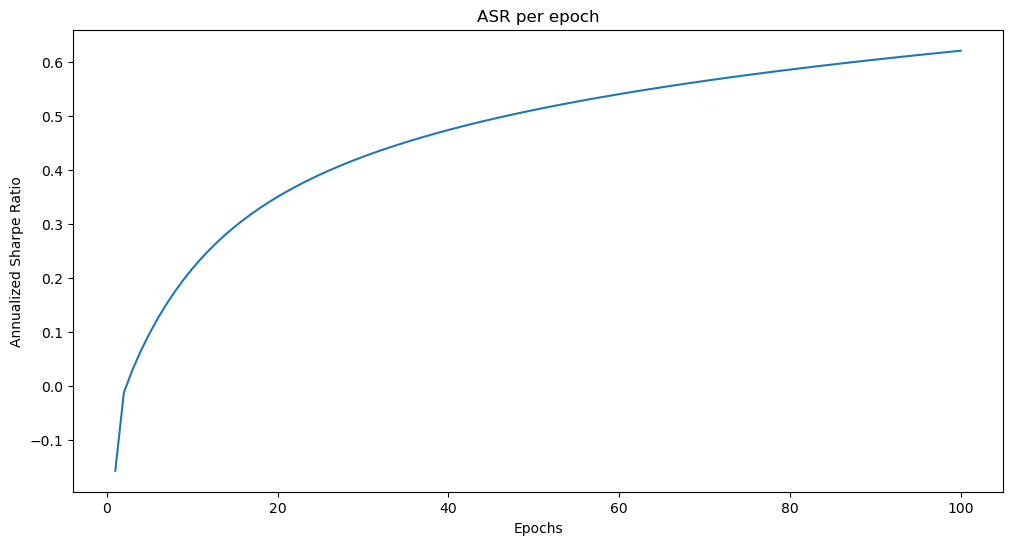

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(arr, SRarr)
plt.xlabel("Epochs")
plt.ylabel("Annualized Sharpe Ratio")
plt.title("ASR per epoch")
plt.show()

In [20]:
test = yf.download('^GSPC', start='2023-01-01', end='2024-12-31', progress=False)
test_prices = test['Close']

In [21]:
test_scaled_prices = []

for i in range(len(test_prices)):
    x = test_prices.squeeze().iloc[i]
    y = (x - test_prices.squeeze().min()) / (test_prices.squeeze().max() - test_prices.squeeze().min())
    test_scaled_prices.append(y)

In [22]:
test_log_returns = []

for i in range(1,len(test_prices)):
    x = np.log(test_prices.squeeze().iloc[i]) - np.log(test_prices.squeeze().iloc[i-1])
    test_log_returns.append(x)

test_log_returns.insert(0,0)

In [23]:
test_smooth_prices = []
test_smooth_prices.append(test_prices.squeeze().iloc[1])
test_alpha = 2/5

for i in range(2, len(test_prices)):
    x = test_prices.squeeze().iloc[i]
    y = test_smooth_prices[-1]
    z = test_prices.squeeze().iloc[i-2]

    p = test_alpha * (x + (0.5 * (x-z))) + (1-test_alpha) * y
    test_smooth_prices.append(p)

In [24]:
test_X = pd.DataFrame({
    'SPrices': test_smooth_prices,
    'Close Prices': test_prices.squeeze()[1:],
    # 'Log Returns': test_log_returns,
    # 'Scaled Prices': test_scaled_prices
})

test_X['PCT'] = test_X['SPrices'].pct_change() * 100
test_X['PCT-1'] = test_X['PCT'].shift(1)
test_X['PCT-2'] = test_X['PCT'].shift(2)
test_X['PCT-3'] = test_X['PCT'].shift(3)
test_X['PCT-4'] = test_X['PCT'].shift(4)
test_X['PCT-5'] = test_X['PCT'].shift(5)
test_X['PCT-6'] = test_X['PCT'].shift(6)
test_X['PCT-7'] = test_X['PCT'].shift(7)

test_X = test_X.dropna()
test_X

,SPrices,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7
Date,,,,,,,,,,
2023-01-17,3992.286035,3990.969971,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221,-0.549081
2023-01-18,3952.869668,3928.860107,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221
2023-01-19,3912.837865,3898.850098,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268
2023-01-20,3945.496762,3972.610107,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306
2023-01-23,3999.414073,4019.810059,1.366553,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5957.033674,5974.069824,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004,-0.041424
2024-12-24,6012.074208,6040.040039,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004
2024-12-26,6034.984466,6037.589844,0.381071,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182


In [25]:
test_Data = pd.DataFrame()

test_Data['Close Prices'] = test_X['Close Prices']
test_Data['SPrices'] = test_X['SPrices']
test_Data['PCT today'] = test_X['PCT']
test_Data['PCT today-1'] = test_X['PCT-1']
test_Data['PCT today-2'] = test_X['PCT-2']
test_Data['PCT today-3'] = test_X['PCT-3']
test_Data['PCT today-4'] = test_X['PCT-4']
test_Data['PCT today-5'] = test_X['PCT-5']
test_Data['PCT today-6'] = test_X['PCT-6']
test_Data['PCT today-7'] = test_X['PCT-7']

test_Data = test_Data.dropna()

test_Data

,Close Prices,SPrices,PCT today,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7
Date,,,,,,,,,,
2023-01-17,3990.969971,3992.286035,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221,-0.549081
2023-01-18,3928.860107,3952.869668,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221
2023-01-19,3898.850098,3912.837865,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268
2023-01-20,3972.610107,3945.496762,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306
2023-01-23,4019.810059,3999.414073,1.366553,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5974.069824,5957.033674,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004,-0.041424
2024-12-24,6040.040039,6012.074208,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004
2024-12-26,6037.589844,6034.984466,0.381071,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182


In [26]:
input_test_data = test_Data.drop(columns=['Close Prices', 'PCT today', 'SPrices'])

Final Portfolio Value: 730137.1950683594
Shares Held: 123
Cash: 3583.582275390625


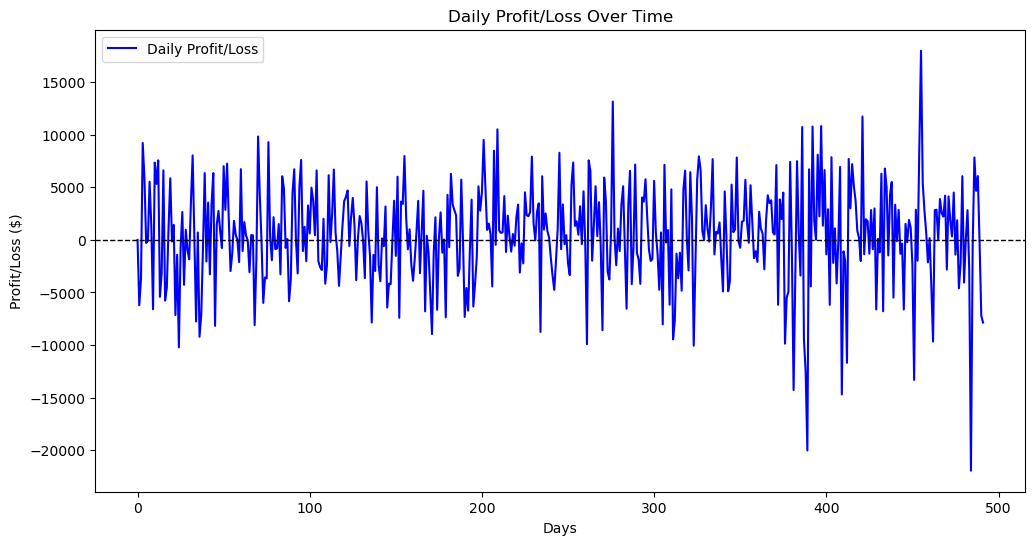

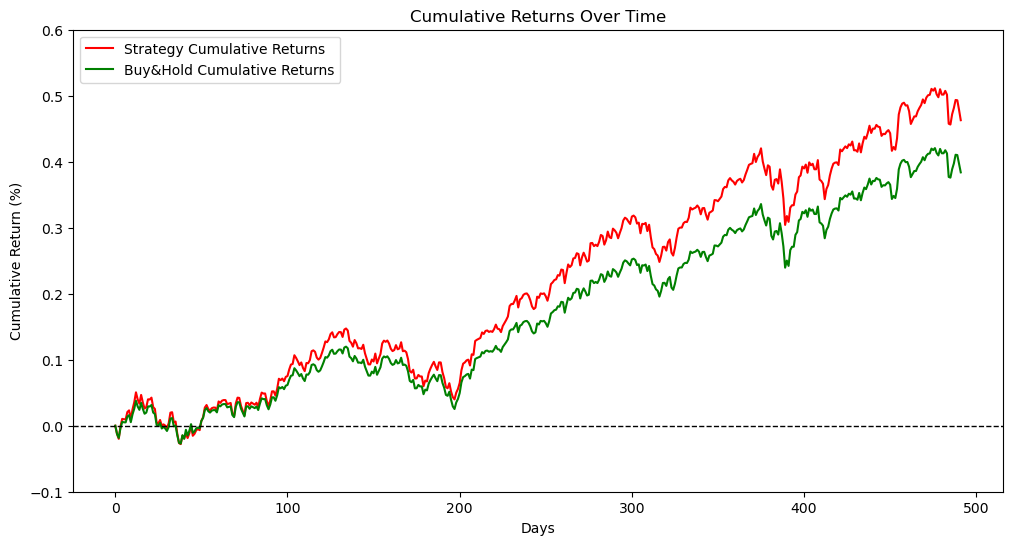

In [27]:
# Initialize tracking variables
portfolio_values = []
profits = []
cumulative_returns = []
allocations = []

# Initialize portfolio
initial_shares = 100
initial_cash = 100000  # Start with no cash
portfolio_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash  # Initial portfolio value
trading_capital = 0.2 * portfolio_value  # 20% of portfolio value for trading
shares_held = initial_shares
cash = initial_cash

cumulative_returns.append(0)
portfolio_values.append(portfolio_value)
profits.append(0)

buy_and_hold_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash
buy_and_hold_cumulative_returns = []
buy_and_hold_cumulative_returns.append(0)

# tradesInfo = [
#     {"Type": 'long', "Price": test_Data['Close Prices'].iloc[0], "Position Size": 100}
# ]

# Trading simulation
for i in range(1,len(input_test_data)):
    current_price = test_Data['Close Prices'].iloc[i]
    current_input = input_test_data.iloc[i]  # Features for the current day
    
    # Forward pass to get allocation
    output_input = np.dot(current_input, weights) + bias
    allocation = np.tanh(output_input).item()  # Model's allocation for the day
    allocations.append(allocation)

    # Recalculate trading capital dynamically
    # trading_capital = 0.2 * portfolio_value

    # Trading logic with risk management
    if allocation > 0.6:  # Buy signal    # 0.6
        # Calculate the number of shares to buy, ensuring cash does not go negative
        max_shares_to_buy = int(cash / current_price) if cash > 0 else 0
        shares_to_buy = min(int((trading_capital * allocation) / current_price), max_shares_to_buy)
        cost = shares_to_buy * current_price
        
        # Update portfolio
        shares_held += shares_to_buy
        cash -= cost

        # Track Trades
        
        # if shares_to_buy > 0:
        #     tradesInfo.append({"Type": 'long', "Price": current_price, "Position Size": shares_to_buy})
    
    elif allocation < -0.8:  # Sell signal   # -0.8
        # Calculate the number of shares to sell
        shares_to_sell = int((trading_capital * abs(allocation)) / current_price)
        shares_to_sell = min(shares_to_sell, shares_held)  # Cannot sell more than held
        revenue = shares_to_sell * current_price
        
        # Update portfolio
        shares_held -= shares_to_sell
        cash += revenue

        # # Track Trades
        # if shares_to_sell > 0:
        #     tradesInfo.append({"Type": 'short', "Price": current_price, "Position Size": shares_to_sell})

    # Update portfolio value
    new_portfolio_value = shares_held * current_price + cash
    daily_profit = new_portfolio_value - portfolio_values[i-1]  # Profit on this day
    portfolio_values.append(new_portfolio_value)
    profits.append(daily_profit)

    # Calculate cumulative return
    cumulative_returns.append((new_portfolio_value / portfolio_values[0]) - 1)
    buy_and_hold_cumulative_returns.append(((initial_shares * current_price + initial_cash) / buy_and_hold_value) - 1)
    
    # Update portfolio value
    portfolio_value = new_portfolio_value

# Final portfolio value
print(f"Final Portfolio Value: {portfolio_value}")
print(f"Shares Held: {shares_held}")
print(f"Cash: {cash}")

# Plot daily profits
plt.figure(figsize=(12, 6))
plt.plot(profits, label="Daily Profit/Loss", color="blue")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero-profit line
plt.xlabel("Days")
plt.ylabel("Profit/Loss ($)")
plt.title("Daily Profit/Loss Over Time")
plt.legend()
plt.show()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label="Strategy Cumulative Returns", color="red")
plt.plot(buy_and_hold_cumulative_returns, label="Buy&Hold Cumulative Returns", color="green")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
plt.ylim(-0.1,0.6)
plt.xlabel("Days")
plt.ylabel("Cumulative Return (%)")
plt.title("Cumulative Returns Over Time")
plt.legend(loc="upper left")
plt.show()

# Plot buy and hold
# plt.figure(figsize=(12, 6))
# plt.plot(buy_and_hold_cumulative_returns, label="Cumulative Returns", color="green")
# plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
# plt.ylim(-0.1,0.6)
# plt.xlabel("Days")
# plt.ylabel("Cumulative Return (%)")
# plt.title("Buy and Hold Cumulative Returns Over Time")
# plt.legend()
# plt.show()

In [28]:
# Calculate daily returns
daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]

# Calculate average daily return
average_daily_return = np.mean(daily_returns)

# Calculate standard deviation of daily returns
std_dev_daily_returns = np.std(daily_returns)

# Annualize the average daily return and standard deviation
annualized_return = average_daily_return * 253
annualized_std_dev = std_dev_daily_returns * np.sqrt(253)

# Risk-free rate
risk_free_rate = 0.0002

# Calculate Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev

print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 1.6386166999146157


In [24]:
# tradesInfo

In [25]:
# pnlTrack = []

# for i in range(len(tradesInfo)):
#     if tradesInfo[i]['Type'] == 'long':
#         for j in range(i+1,len(tradesInfo)):
#             if tradesInfo[j]['Type'] == 'short':
#                 pnlTrack.append((tradesInfo[j]['Price'] - tradesInfo[i]['Price']) * tradesInfo[j]['Position Size'])
#                 break

#     else:
#         for j in range(i+1,len(tradesInfo)):
#             if tradesInfo[j]['Type'] == 'long':
#                 pnlTrack.append((tradesInfo[i]['Price'] - tradesInfo[j]['Price']) * tradesInfo[i]['Position Size'])
#                 break

In [26]:
sum(profits)

229343.31030273438

In [27]:
# sum(allocations)

In [28]:
# min(allocations)

In [29]:
# max(allocations)

In [30]:
allocations

[0.6542052277452715,
 0.19241451435615028,
 -0.8029863533681868,
 -0.9756323056894476,
 -0.08898611029292963,
 0.9899998989390774,
 0.9980348025695194,
 0.9811717316066693,
 0.8320140721144166,
 0.3345663036379102,
 -0.48384212086396744,
 0.30971680087896486,
 0.8614071612526983,
 0.9894295907018571,
 0.9426446365116116,
 0.11065510476669904,
 -0.5408263357074228,
 -0.5748758222996364,
 -0.4775145237979552,
 0.0985007395325494,
 0.9086455597967985,
 0.9515066462979902,
 0.983042055241658,
 0.6654963546338263,
 -0.47754458138388733,
 -0.9570374390865216,
 -0.7744165290920297,
 0.6779706427481016,
 0.9533048956721655,
 0.9717257968494494,
 0.9516312864991444,
 0.7844669206881302,
 0.7430972168099933,
 0.9897247380424202,
 0.993707309701538,
 0.7406466262104475,
 -0.3112257806776336,
 -0.9526473798450411,
 -0.9777695595644748,
 -0.7338308654831008,
 0.9818067053833969,
 0.9951504764736017,
 0.9994465177130855,
 0.9822459600886874,
 0.7968496745254051,
 0.754800718869039,
 0.52306664580400

In [31]:
# buy_and_hold_cumulative_returns

In [32]:
# # Calculation for Asset Returns and Mu
# asset_returns = allocations * test_Data['PCT today'][1:].values
# average_daily_return = np.mean(asset_returns)
# average_daily_excess_return = average_daily_return - k
    
# # Calculation of Standard deviation
# squared_deviations = np.square(asset_returns - average_daily_excess_return)
# sigma = np.sqrt(np.mean(squared_deviations))
    
# # Annulaized Sharpe Ratio
# annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
# print(f"Annualized Sharpe Ratio: {annualized_SR}")